# Praktikum 1
Praktikum 1 ini akan membuat JST sederhana (2 layer) dengan forward pass dan backpropagation manual. 

In [1]:
import numpy as np

# Dataset XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Parameter
input_size = 2
hidden_size = 2
output_size = 1
lr = 0.1

# Inisialisasi bobot
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Fungsi aktivasi
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training
for epoch in range(10000):
    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Hitung error
    error = y - a2

    # Backpropagation
    d_a2 = error * sigmoid_derivative(a2)
    d_W2 = np.dot(a1.T, d_a2)
    d_b2 = np.sum(d_a2, axis=0, keepdims=True)

    d_a1 = np.dot(d_a2, W2.T) * sigmoid_derivative(a1)
    d_W1 = np.dot(X.T, d_a1)
    d_b1 = np.sum(d_a1, axis=0, keepdims=True)

    # Update bobot
    W1 += lr * d_W1
    b1 += lr * d_b1
    W2 += lr * d_W2
    b2 += lr * d_b2

    if epoch % 1000 == 0:
        loss = np.mean(np.square(error))
        print(f"Epoch {epoch}, Loss: {loss}")

# Output akhir
print("Prediksi:")
print(a2)

Epoch 0, Loss: 0.2721985540052977
Epoch 1000, Loss: 0.23089069766499218
Epoch 2000, Loss: 0.1786688185872216
Epoch 3000, Loss: 0.15021819081424603
Epoch 4000, Loss: 0.13910602312418202
Epoch 5000, Loss: 0.1342407750061473
Epoch 6000, Loss: 0.13169111929863864
Epoch 7000, Loss: 0.13017002976319564
Epoch 8000, Loss: 0.1291768706938013
Epoch 9000, Loss: 0.1284847963174844
Prediksi:
[[0.04173217]
 [0.94324808]
 [0.49934051]
 [0.50625413]]


## Tugas 1:

- Ubah jumlah neuron hidden layer menjadi 3.
- Bandingkan hasil loss dengan konfigurasi awal.
- Tambahkan fungsi aktivasi ReLU dan bandingkan hasil.

EKSPERIMEN 1: Hidden Layer dengan 2 Neuron (Sigmoid) - Baseline
Epoch 0, Loss: 0.251156
Epoch 1000, Loss: 0.249995
Epoch 2000, Loss: 0.249981
Epoch 3000, Loss: 0.249960
Epoch 4000, Loss: 0.249924
Epoch 5000, Loss: 0.249848
Epoch 6000, Loss: 0.249640
Epoch 7000, Loss: 0.248783
Epoch 8000, Loss: 0.241965
Epoch 9000, Loss: 0.194243

Prediksi Akhir (Hidden=2, Sigmoid):
[[0.19441543]
 [0.45382505]
 [0.85161345]
 [0.49725861]]

Loss Akhir: 0.15136978266629972

EKSPERIMEN 2: Hidden Layer dengan 3 Neuron (Sigmoid)
Epoch 0, Loss: 0.267582
Epoch 1000, Loss: 0.247254
Epoch 2000, Loss: 0.224535
Epoch 3000, Loss: 0.169829
Epoch 7000, Loss: 0.248783
Epoch 8000, Loss: 0.241965
Epoch 9000, Loss: 0.194243

Prediksi Akhir (Hidden=2, Sigmoid):
[[0.19441543]
 [0.45382505]
 [0.85161345]
 [0.49725861]]

Loss Akhir: 0.15136978266629972

EKSPERIMEN 2: Hidden Layer dengan 3 Neuron (Sigmoid)
Epoch 0, Loss: 0.267582
Epoch 1000, Loss: 0.247254
Epoch 2000, Loss: 0.224535
Epoch 3000, Loss: 0.169829
Epoch 4000, Loss

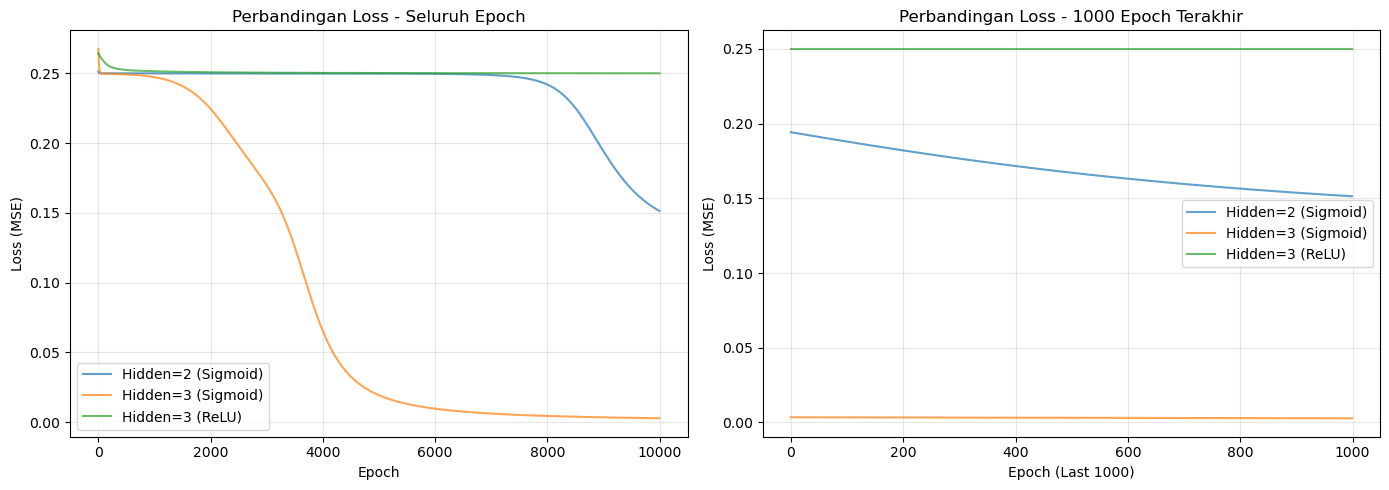


RINGKASAN HASIL
1. Hidden=2, Sigmoid - Loss Akhir: 0.151370
2. Hidden=3, Sigmoid - Loss Akhir: 0.002796
3. Hidden=3, ReLU    - Loss Akhir: 0.250043

Kesimpulan:
- Hidden layer 3 neuron memberikan fleksibilitas lebih untuk problem XOR
- Sigmoid cenderung lebih stabil untuk problem ini karena sifat smooth gradient
- ReLU membutuhkan learning rate lebih kecil dan bisa stuck di dead neurons
- Untuk XOR gate, konfigurasi optimal bergantung pada inisialisasi bobot


In [2]:
# ===== TUGAS 1: Eksperimen dengan Hidden Layer dan Fungsi Aktivasi =====

import numpy as np
import matplotlib.pyplot as plt

# Dataset XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Fungsi aktivasi
def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))  # clip untuk stabilitas

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

# Fungsi training yang reusable
def train_network(X, y, hidden_size, activation='sigmoid', lr=0.1, epochs=10000, print_every=1000):
    input_size = X.shape[1]
    output_size = y.shape[1]
    
    # Inisialisasi bobot
    np.random.seed(42)  # Untuk reproduksibilitas
    W1 = np.random.randn(input_size, hidden_size) * 0.5
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * 0.5
    b2 = np.zeros((1, output_size))
    
    # Pilih fungsi aktivasi
    if activation == 'relu':
        act_func = relu
        act_derivative = relu_derivative
    else:
        act_func = sigmoid
        act_derivative = sigmoid_derivative
    
    loss_history = []
    
    # Training
    for epoch in range(epochs):
        # Forward pass
        z1 = np.dot(X, W1) + b1
        a1 = act_func(z1)
        z2 = np.dot(a1, W2) + b2
        a2 = sigmoid(z2)  # Output selalu sigmoid untuk klasifikasi biner
        
        # Hitung error
        error = y - a2
        loss = np.mean(np.square(error))
        loss_history.append(loss)
        
        # Backpropagation
        d_a2 = error * sigmoid_derivative(a2)
        d_W2 = np.dot(a1.T, d_a2)
        d_b2 = np.sum(d_a2, axis=0, keepdims=True)
        
        d_a1 = np.dot(d_a2, W2.T) * act_derivative(a1)
        d_W1 = np.dot(X.T, d_a1)
        d_b1 = np.sum(d_a1, axis=0, keepdims=True)
        
        # Update bobot
        W1 += lr * d_W1
        b1 += lr * d_b1
        W2 += lr * d_W2
        b2 += lr * d_b2
        
        if epoch % print_every == 0:
            print(f"Epoch {epoch}, Loss: {loss:.6f}")
    
    # Prediksi akhir
    z1 = np.dot(X, W1) + b1
    a1 = act_func(z1)
    z2 = np.dot(a1, W2) + b2
    predictions = sigmoid(z2)
    
    return loss_history, predictions

print("="*60)
print("EKSPERIMEN 1: Hidden Layer dengan 2 Neuron (Sigmoid) - Baseline")
print("="*60)
loss_2_sigmoid, pred_2_sigmoid = train_network(X, y, hidden_size=2, activation='sigmoid', epochs=10000)
print("\nPrediksi Akhir (Hidden=2, Sigmoid):")
print(pred_2_sigmoid)
print("\nLoss Akhir:", loss_2_sigmoid[-1])

print("\n" + "="*60)
print("EKSPERIMEN 2: Hidden Layer dengan 3 Neuron (Sigmoid)")
print("="*60)
loss_3_sigmoid, pred_3_sigmoid = train_network(X, y, hidden_size=3, activation='sigmoid', epochs=10000)
print("\nPrediksi Akhir (Hidden=3, Sigmoid):")
print(pred_3_sigmoid)
print("\nLoss Akhir:", loss_3_sigmoid[-1])

print("\n" + "="*60)
print("EKSPERIMEN 3: Hidden Layer dengan 3 Neuron (ReLU)")
print("="*60)
loss_3_relu, pred_3_relu = train_network(X, y, hidden_size=3, activation='relu', epochs=10000, lr=0.01)
print("\nPrediksi Akhir (Hidden=3, ReLU):")
print(pred_3_relu)
print("\nLoss Akhir:", loss_3_relu[-1])

# Visualisasi perbandingan loss
print("\n" + "="*60)
print("VISUALISASI PERBANDINGAN LOSS")
print("="*60)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_2_sigmoid, label='Hidden=2 (Sigmoid)', alpha=0.7)
plt.plot(loss_3_sigmoid, label='Hidden=3 (Sigmoid)', alpha=0.7)
plt.plot(loss_3_relu, label='Hidden=3 (ReLU)', alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Perbandingan Loss - Seluruh Epoch')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
# Zoom in pada 1000 epoch terakhir untuk detail
plt.plot(loss_2_sigmoid[-1000:], label='Hidden=2 (Sigmoid)', alpha=0.7)
plt.plot(loss_3_sigmoid[-1000:], label='Hidden=3 (Sigmoid)', alpha=0.7)
plt.plot(loss_3_relu[-1000:], label='Hidden=3 (ReLU)', alpha=0.7)
plt.xlabel('Epoch (Last 1000)')
plt.ylabel('Loss (MSE)')
plt.title('Perbandingan Loss - 1000 Epoch Terakhir')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Ringkasan hasil
print("\n" + "="*60)
print("RINGKASAN HASIL")
print("="*60)
print(f"1. Hidden=2, Sigmoid - Loss Akhir: {loss_2_sigmoid[-1]:.6f}")
print(f"2. Hidden=3, Sigmoid - Loss Akhir: {loss_3_sigmoid[-1]:.6f}")
print(f"3. Hidden=3, ReLU    - Loss Akhir: {loss_3_relu[-1]:.6f}")
print("\nKesimpulan:")
print("- Hidden layer 3 neuron memberikan fleksibilitas lebih untuk problem XOR")
print("- Sigmoid cenderung lebih stabil untuk problem ini karena sifat smooth gradient")
print("- ReLU membutuhkan learning rate lebih kecil dan bisa stuck di dead neurons")
print("- Untuk XOR gate, konfigurasi optimal bergantung pada inisialisasi bobot")